<a href="https://colab.research.google.com/github/als1379/Statistical-and-Mathematical-Methods-for-Artificial-Intelligence/blob/main/%D8%A2%D9%8C2/HW_2_Classification_of_MNIST_Digits_with_SVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification of MNIST Digits with SVD

## Download dataset


In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("animatronbot/mnist-digit-recognizer")

print("Path to dataset files:", path)

100%|██████████| 9.16M/9.16M [00:00<00:00, 23.4MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/animatronbot/mnist-digit-recognizer/versions/1


In [2]:
import pandas as pd
import numpy as np

dataset = pd.read_csv(path + '/train.csv')

In [3]:
dataset.iloc[0]

,0
label,1
pixel0,0
pixel1,0
pixel2,0
pixel3,0
...,...
pixel779,0
pixel780,0
pixel781,0
pixel782,0


In [4]:
y = dataset['label']
X = dataset.drop('label', axis=1)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (42000, 784)
Shape of y: (42000,)


## Visualize images

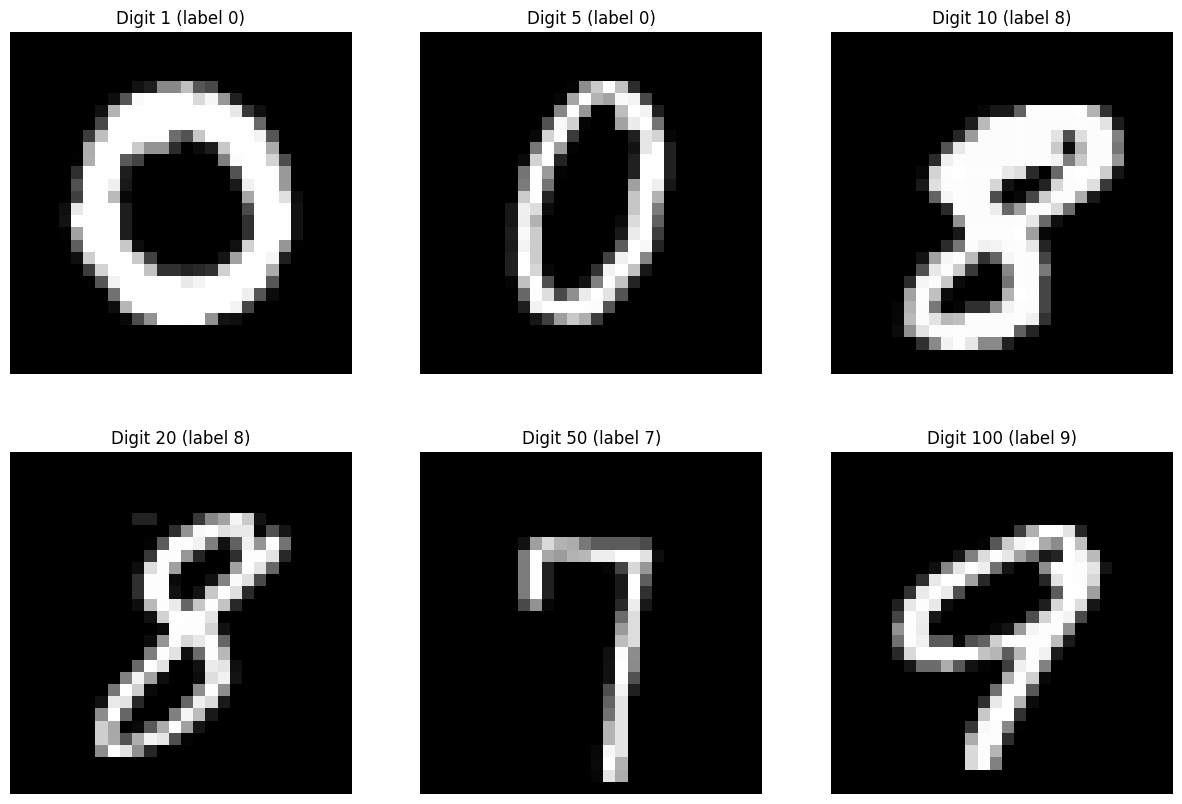

In [5]:
import matplotlib.pyplot as plt

def visualize_image(index, X):
  try:
    img = X.iloc[index].values.reshape(28, 28)
    return img
  except IndexError:
    print(f"Index {index} is out of range. Please provide a valid index.")
  except Exception as e:
    print(f"An error occurred: {e}")

indices = [1, 5, 10, 20, 50, 100]
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.ravel()

for i, index in enumerate(indices):
    axs[i].imshow(visualize_image(index, X), cmap='gray')
    axs[i].set_title(f"Digit {index} (label {y[index]})")
    axs[i].axis('off')


## Filter 3 and 4

In [6]:
import numpy as np

# Assuming X is already defined as a NumPy array (if not, convert it using X = np.array(X))
X_filtered = X[(y == 3) | (y == 4)]
y_filtered = y[(y == 3) | (y == 4)]

print("Shape of X_filtered:", X_filtered.shape)
print("Shape of y_filtered:", y_filtered.shape)

Shape of X_filtered: (8423, 784)
Shape of y_filtered: (8423,)


In [7]:
X_filtered = X_filtered.reset_index(drop=True)
y_filtered = y_filtered.reset_index(drop=True)
print("Shape of X_filtered:", X_filtered.shape)
print("Shape of y_filtered:", y_filtered.shape)

Shape of X_filtered: (8423, 784)
Shape of y_filtered: (8423,)


In [8]:
y_filtered

,label
0,4
1,3
2,3
3,3
4,3
...,...
8418,4
8419,3
8420,3
8421,3


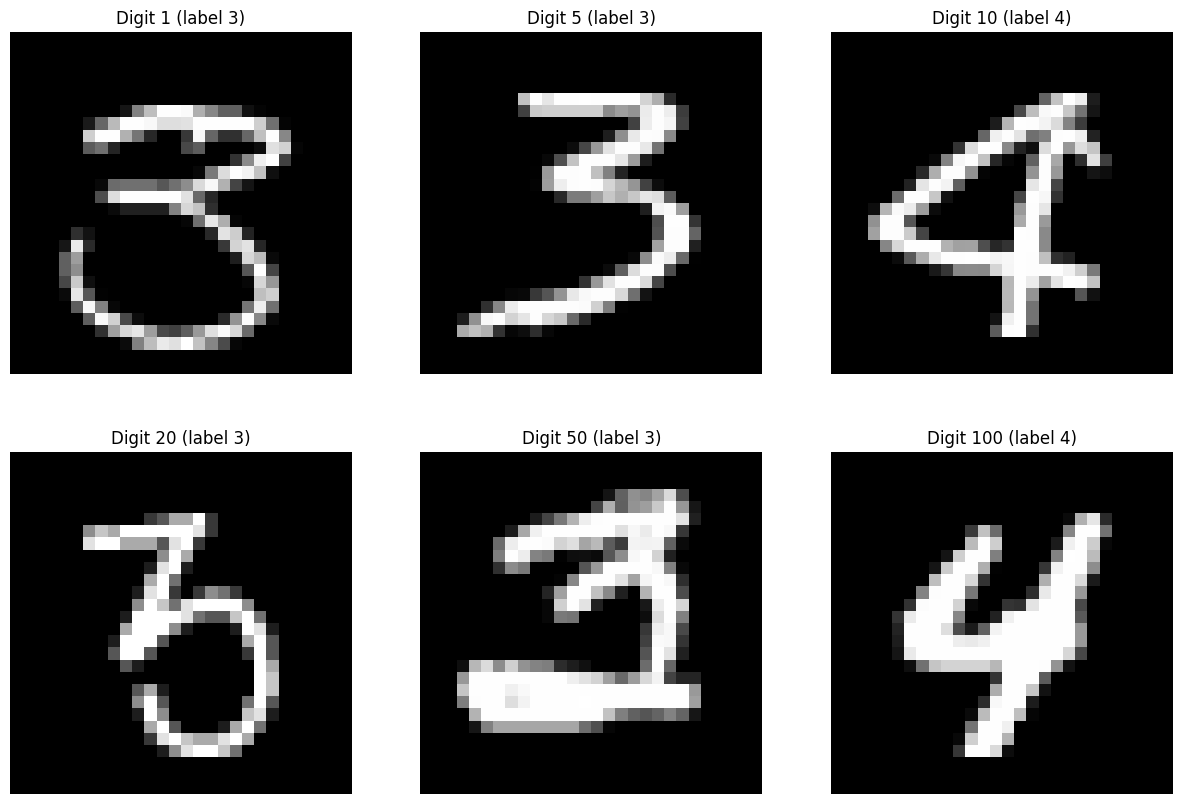

In [9]:
indices = [1, 5, 10, 20, 50, 100]
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.ravel()

for i, index in enumerate(indices):
    axs[i].imshow(visualize_image(index, X_filtered), cmap='gray')
    axs[i].set_title(f"Digit {index} (label {y_filtered[index]})")
    axs[i].axis('off')


## Split test and train

In [10]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (6738, 784)
Shape of y_train: (6738,)
Shape of X_test: (1685, 784)
Shape of y_test: (1685,)


## Splite each class
c1 = (digit 3), c2 = (digit 4)

In [11]:
# Create X1 (3-digit images) and X2 (4-digit images)
X1_train = X_train[y_train == 3].T
X2_train = X_train[y_train == 4].T

print("Shape of X1_train:", X1_train.shape)
print("Shape of X2_train:", X2_train.shape)

Shape of X1_train: (784, 3477)
Shape of X2_train: (784, 3261)


## Compute SVD of each class of training set

In [12]:
U1, S1, Vh1 = np.linalg.svd(X1_train, full_matrices=False)
U2, S2, Vh2 = np.linalg.svd(X2_train, full_matrices=False)

## Get a sample and compute projection, and compute the distance of projection into each class

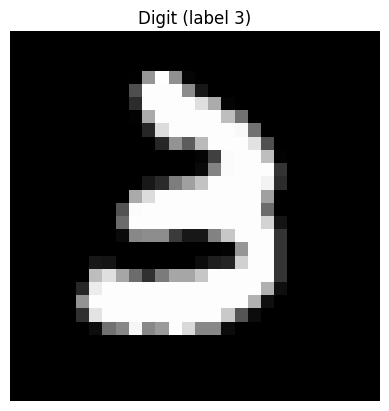

In [13]:
# Sample from X_test and y_test
sample_index = 100  # Choose a sample index (you can change this)
sample_x = X_test.iloc[sample_index].values.reshape(28, 28)
sample_y = y_test.iloc[sample_index]

# Visualize the sample
plt.imshow(sample_x, cmap='gray')
plt.title(f"Digit (label {sample_y})")
plt.axis('off')
plt.show()

compute $x_1^\perp$ and  $x_2^\perp$

In [14]:
x_sample = X_test.iloc[sample_index]
x_1_perp = U1 @ (U1.T @ x_sample)
x_2_perp = U2 @ (U2.T @ x_sample)

compute $d_1 = || x − x_1^\perp ||_2$ and $d_2 = || x − x_2^\perp ||_2$

In [15]:
# Assuming x_sample, x_1_perp, and x_2_perp are already defined as numpy arrays
distance_x1 = np.linalg.norm(x_sample - x_1_perp)
distance_x2 = np.linalg.norm(x_sample - x_2_perp)

print(f"Distance between x_sample and x1_prep (norm 2): {distance_x1}")
print(f"Distance between x_sample and x2_prep (norm 2): {distance_x2}")

Distance between x_sample and x1_prep (norm 2): 3.267214902135596e-12
Distance between x_sample and x2_prep (norm 2): 4.623439032304527e-12


In [16]:
def classify_digit(distance_x1, distance_x2):
    if distance_x1 < distance_x2:
        return 3
    else:
        return 4

In [17]:
classify_digit(distance_x1, distance_x2)

3

True prediction for this sample

## Classify all test dataset and compute misclassification rate

In [18]:
predictions = []
for i in range(len(X_test)):
    x_sample = X_test.iloc[i]
    x_1_perp = U1 @ (U1.T @ x_sample)
    x_2_perp = U2 @ (U2.T @ x_sample)
    distance_x1 = np.linalg.norm(x_sample - x_1_perp)
    distance_x2 = np.linalg.norm(x_sample - x_2_perp)
    prediction = classify_digit(distance_x1, distance_x2)
    predictions.append(prediction)

print(predictions)


[3, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 4, 4, 4, 4, 4, 3, 4, 3, 4, 3, 3, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 4, 3, 3, 3, 4, 4, 3, 3, 4, 3, 3, 4, 4, 3, 4, 4, 4, 4, 3, 3, 4, 3, 3, 4, 4, 3, 3, 4, 4, 4, 4, 4, 3, 3, 4, 4, 3, 3, 4, 4, 3, 3, 4, 3, 4, 4, 4, 3, 3, 4, 3, 3, 3, 4, 4, 3, 3, 4, 3, 4, 3, 3, 3, 3, 3, 3, 4, 3, 3, 4, 4, 3, 3, 3, 3, 3, 4, 4, 3, 3, 3, 3, 4, 4, 3, 4, 3, 4, 3, 3, 4, 3, 3, 4, 3, 3, 4, 4, 3, 3, 3, 3, 4, 4, 4, 3, 3, 3, 4, 3, 4, 3, 3, 3, 3, 4, 4, 3, 3, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 4, 3, 4, 4, 3, 4, 3, 4, 3, 4, 3, 3, 3, 4, 3, 3, 4, 3, 3, 3, 4, 3, 3, 3, 4, 3, 4, 4, 3, 3, 4, 3, 3, 4, 3, 3, 3, 4, 3, 4, 3, 3, 4, 4, 3, 4, 3, 3, 4, 4, 4, 3, 3, 3, 3, 4, 4, 4, 4, 3, 3, 4, 4, 3, 4, 3, 3, 3, 4, 4, 4, 4, 3, 3, 3, 3, 4, 3, 3, 3, 4, 3, 3, 3, 4, 4, 3, 3, 3, 3, 4, 3, 4, 3, 4, 4, 4, 4, 3, 4, 4, 3, 4, 4, 4, 4, 3, 3, 4, 3, 4, 4, 3, 4, 3, 4, 4, 3, 3, 3, 4, 4, 3, 3, 4, 4, 3, 4, 3, 4, 3, 4, 4, 3, 4, 3, 3, 3, 4, 3, 3, 4, 4, 3, 3, 4, 4, 4, 3, 4, 3, 3, 3, 3, 3, 4, 3, 

In [19]:
misclassified_count = 0
for i in range(len(X_test)):
    if predictions[i] != y_test.iloc[i]:
        misclassified_count += 1

misclassification_rate = misclassified_count / len(X_test)
print(f"Misclassification rate: {misclassification_rate}")
print(f"Accuracy: {1 - misclassification_rate}")

Misclassification rate: 0.030267062314540058
Accuracy: 0.96973293768546


# Other two digits

1, 7 (simillar digits)

In [31]:
X_filtered = X[(y == 1) | (y == 7)]
y_filtered = y[(y == 1) | (y == 7)]

X_filtered = X_filtered.reset_index(drop=True)
y_filtered = y_filtered.reset_index(drop=True)
print("Shape of X_filtered:", X_filtered.shape)
print("Shape of y_filtered:", y_filtered.shape)

X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)

X1_train = X_train[y_train == 1].T
X2_train = X_train[y_train == 7].T

U1, S1, Vh1 = np.linalg.svd(X1_train, full_matrices=False)
U2, S2, Vh2 = np.linalg.svd(X2_train, full_matrices=False)

predictions = []
for i in range(len(X_test)):
    x_sample = X_test.iloc[i]
    x_1_perp = U1 @ (U1.T @ x_sample)
    x_2_perp = U2 @ (U2.T @ x_sample)

    distance_x1 = np.linalg.norm(x_sample - x_1_perp)
    distance_x2 = np.linalg.norm(x_sample - x_2_perp)

    if distance_x1 < distance_x2:
        prediction = 1
    else:
        prediction = 7

    predictions.append(prediction)

print(predictions)

# Misclassification
misclassified_count = 0
for i in range(len(X_test)):
    if predictions[i] != y_test.iloc[i]:
        misclassified_count += 1

misclassification_rate = misclassified_count / len(X_test)
print(f"Misclassification rate: {misclassification_rate}")
print(f"Accuracy: {1 - misclassification_rate}")

Shape of X_filtered: (9085, 784)
Shape of y_filtered: (9085,)
[1, 7, 1, 1, 7, 1, 7, 1, 1, 1, 7, 1, 1, 1, 1, 1, 7, 7, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 7, 1, 1, 1, 7, 7, 1, 1, 7, 1, 1, 1, 1, 1, 7, 7, 1, 1, 7, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 7, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 7, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 7, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 7, 7, 7, 7, 7, 1, 7, 1, 1, 1, 1, 7, 1, 1, 7, 7, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 7, 1, 1, 1, 7, 7, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 7, 7, 1, 7, 1, 1, 7, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 7, 7, 1, 1, 1, 1, 7, 7, 1, 1, 1, 7, 7, 1, 1, 1, 1, 7, 1, 1, 1, 1, 7, 7, 7, 7, 1, 1, 1, 7, 1, 7, 1, 1, 1, 1, 7, 7, 1, 7, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 7, 1, 1, 7, 7, 7, 1, 1, 1, 1, 7, 7, 1, 1, 1, 1, 1, 7, 7, 7, 1, 1, 7, 7, 7, 1, 1, 1, 7, 1, 1, 7, 1, 7, 1, 1, 1, 1, 1, 7, 1, 1, 1, 7, 1, 1, 1, 1, 1, 7, 1, 1, 7, 1, 1, 7, 1, 7, 1, 1, 1, 1, 1, 1

lower accuracy because of simillarity of 1 and 7

## Do the whole process for three digits

In [23]:
def predict(X_train, y_train, x):
  min_d = np.inf
  classed = -1
  for i in range(3):
      X = X_train[y_train == i].T
      U, _, _ = np.linalg.svd(X, full_matrices=False)
      x_perp = U @ (U.T @ x)
      distance_x = np.linalg.norm(x - x_perp)
      if distance_x < min_d:
          classed = i
          min_d = distance_x
  return classed

In [24]:
# Assuming X is already defined as a NumPy array (if not, convert it using X = np.array(X))
X_filtered = X[(y == 0) | (y == 1) | (y == 2)]
y_filtered = y[(y == 0) | (y == 1) | (y == 2)]

X_filtered = X_filtered.reset_index(drop=True)
y_filtered = y_filtered.reset_index(drop=True)
print("Shape of X_filtered:", X_filtered.shape)
print("Shape of y_filtered:", y_filtered.shape)

X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)

# Do the process for 1 sample
x_sample = X_train.iloc[i]
prediction = predict(X_train, y_train, X_test.iloc[1])

print(f"Predicted digit: {prediction}")
print(f"True digit: {y_test.iloc[1]}")

Shape of X_filtered: (12993, 784)
Shape of y_filtered: (12993,)
Shape of X_filtered: (12993, 784)
Shape of y_filtered: (12993,)
Predicted digit: 1
True digit: 1


In [27]:
def classify_digit(distance_x1, distance_x2, distance_x3):
    if distance_x1 < distance_x2 and distance_x1 < distance_x3:
        return 0
    elif distance_x2 < distance_x1 and distance_x2 < distance_x3:
        return 1
    else:
        return 2

In [28]:
from tqdm import tqdm

X1_train = X_train[y_train == 0].T
X2_train = X_train[y_train == 1].T
X3_train = X_train[y_train == 2].T

U1, S1, Vh1 = np.linalg.svd(X1_train, full_matrices=False)
U2, S2, Vh2 = np.linalg.svd(X2_train, full_matrices=False)
U3, S3, Vh3 = np.linalg.svd(X3_train, full_matrices=False)

predictions = []
for i in range(len(X_test)):
    x_sample = X_test.iloc[i]
    x_1_perp = U1 @ (U1.T @ x_sample)
    x_2_perp = U2 @ (U2.T @ x_sample)
    x_3_perp = U3 @ (U3.T @ x_sample)

    distance_x1 = np.linalg.norm(x_sample - x_1_perp)
    distance_x2 = np.linalg.norm(x_sample - x_2_perp)
    distance_x3 = np.linalg.norm(x_sample - x_3_perp)

    prediction = classify_digit(distance_x1, distance_x2, distance_x3)
    predictions.append(prediction)

print(predictions)

# Misclassification
misclassified_count = 0
for i in range(len(X_test)):
    if predictions[i] != y_test.iloc[i]:
        misclassified_count += 1

misclassification_rate = misclassified_count / len(X_test)

[0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 2, 1, 0, 0, 0, 0, 1, 0, 1, 1, 2, 0, 1, 0, 2, 2, 2, 0, 0, 0, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 0, 1, 2, 2, 1, 2, 2, 2, 2, 1, 0, 2, 2, 0, 0, 1, 1, 2, 1, 2, 0, 0, 0, 2, 2, 1, 0, 2, 1, 0, 2, 0, 1, 2, 2, 2, 1, 0, 1, 1, 2, 2, 2, 0, 2, 2, 1, 0, 2, 1, 0, 1, 0, 1, 0, 2, 0, 1, 2, 0, 1, 1, 1, 2, 0, 2, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 2, 2, 0, 0, 0, 0, 1, 2, 1, 1, 1, 0, 2, 1, 0, 1, 0, 1, 2, 0, 2, 1, 2, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 0, 0, 2, 2, 1, 0, 0, 2, 2, 1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 2, 0, 1, 1, 0, 0, 2, 0, 2, 0, 1, 1, 0, 1, 0, 0, 1, 2, 2, 0, 2, 1, 1, 1, 2, 0, 0, 0, 1, 2, 2, 2, 1, 0, 0, 1, 2, 0, 2, 0, 1, 1, 2, 0, 1, 1, 1, 1, 2, 0, 0, 2, 0, 0, 0, 1, 0, 2, 2, 1, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 0, 2, 1, 2, 2, 0, 1, 1, 0, 2, 1, 1, 0, 1, 1, 1, 2, 1, 0, 0, 0, 1, 2, 1, 1, 0, 0, 0, 2, 0, 2, 

In [29]:
misclassification_rate

0.07656791073489803

93 percent accuracy for three digits of 0 and 1 and 2

we can find U matrix for each digit and finally calculate prep and distances for all 10 classes